# DATA PREPROCESSING

### Check data

In [3]:
df = raw_df.copy()
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df = df.rename(columns={'age': 'Age', 
                          'job': 'Type of job',
                          'marital': 'Marital status',
                          'education': 'Education',
                          'default': 'Credit',
                          'housing': 'Housing loan',
                          'loan': 'Personal loan',
                          'contact': 'Contact communication type',
                          'month': 'Latest month',
                          'day_of_week': 'Latest day',
                          'duration': 'Latest duration',
                          'campaign': 'Number of contacts',
                          'pdays': 'Passed days',
                          'previous': "Previous campaign's number",
                          'poutcome': "Previous campaign outcome",
                          'y': 'Label'})

In [5]:
df['Label'] = df['Label'].replace({'yes': 1, 'no': 0, 'unknown': pd.NA}).astype('Int64')
df = df.replace('unknown', pd.NA)

# The value 999 in the 'Passed days' column was recoded to -1 to denote missing contact history. An additional binary column was created to flag customers who were never contacted
df['Passed days'] = df['Passed days'].replace(999, pd.NA)
def contactstatus(x):
    if pd.isna(x):
        return 'Never contacted'
    else:
        return 'Was previously contacted'
df['Contact status'] = df['Passed days'].apply(contactstatus)
df['Passed days'] = df['Passed days'].fillna(-1).astype(int)

def Agerange(x):
    if x < 21:
        return '16-20'
    elif x < 26:
        return '21-25'
    elif x < 31:
        return '26-30'
    elif x < 36:
        return '31-35'
    elif x < 41:
        return '36-40'
    elif x < 46:
        return '41-45'
    elif x < 51:
        return '46-50'
    elif x < 56:
        return '51-55'
    elif x < 61:
        return '56-60'
    elif x < 66:
        return '61-65'
    elif x < 71:
        return '66-70'
    elif x < 76:
        return '71-75'
    elif x < 81:
        return '76-80'
    elif x < 86:
        return '81-85'
    elif x < 91:
        return '86-90'
    elif x < 96:
        return '91-95'
    elif x < 101:
        return '96-100'

df['Age range'] = df['Age'].apply(Agerange)

def Durationrange(x):
    if x == 0:
        return '00min'
    elif x < 301:
        return '<06mins'
    elif x < 601:
        return '06-10mins'
    elif x < 901:
        return '11-15mins'
    elif x < 1201:
        return '16-20mins'
    elif x < 1501:
        return '21-25mins'
    elif x < 1801:
        return '26-30mins'
    elif x < 2101:
        return '31-35mins'
    elif x < 2401:
        return '36-40mins'
    elif x < 2701:
        return '41-45mins'
    elif x < 3001:
        return '46-50mins'
    elif x < 3301:
        return '51-55mins'
    elif x < 3601:
        return '56-60mins'
    elif x < 3901:
        return '61-65mins'
    elif x < 4201:
        return '66-70mins'
    elif x < 4501:
        return '71-75mins'
    elif x < 4801:
        return '76-80mins'
    elif x < 5101:
        return '81-85mins'

df['Latest duration range'] = df['Latest duration'].apply(Durationrange)

In [6]:
df.duplicated().sum()

np.int64(12)

In [7]:
df.isna().sum()

Age                              0
Type of job                    330
Marital status                  80
Education                     1731
Credit                        8597
Housing loan                   990
Personal loan                  990
Contact communication type       0
Latest month                     0
Latest day                       0
Latest duration                  0
Number of contacts               0
Passed days                      0
Previous campaign's number       0
Previous campaign outcome        0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
Label                            0
Contact status                   0
Age range                        0
Latest duration range            0
dtype: int64

### Clean data

##### **The duplicate cases**
These cases are identical in the columns: duration, last contact day, last contact month, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed  
→ These are unlikely to occur naturally, so they can be safely removed 

In [8]:
df[df.duplicated(keep=False)]

,Age,Type of job,Marital status,Education,Credit,Housing loan,Personal loan,Contact communication type,Latest month,Latest day,...,Previous campaign outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Label,Contact status,Age range,Latest duration range
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,Never contacted,36-40,<06mins
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,Never contacted,36-40,<06mins
12260,36,retired,married,<NA>,no,no,no,telephone,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0,Never contacted,36-40,<06mins
12261,36,retired,married,<NA>,no,no,no,telephone,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0,Never contacted,36-40,<06mins
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,Never contacted,26-30,06-10mins
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,Never contacted,26-30,06-10mins
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,Never contacted,46-50,<06mins
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,Never contacted,46-50,<06mins
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0,Never contacted,31-35,<06mins
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0,Never contacted,31-35,<06mins


In [9]:
df.drop_duplicates(inplace=True)

##### **Missing values rows** 
These rows in the dataset need to be considered for removal to ensure accuracy and efficiency in analysis:
- Type of job: 330 missing values, object
- Marital status: 80 missing values, object
- Education: 1731 missing values, object
- Housing loan: 990 missing values, boolen
- Personal loan: 990 missing values, boolen

In [10]:
df.dropna(subset=["Type of job", 'Marital status', 'Education', 'Housing loan', 'Personal loan'], inplace=True)

##### **Missing values columns** 
These columns in the dataset need to be considered for removal to ensure accuracy and efficiency in analysis:
- Contact communication type: It is not essential to distinguishes between 'cellular' and 'telephone'. Many people primarily use their mobile phones for all calls, whether to other mobile numbers or landlines. From a contact perspective, both essentially represent a phone number for direct communication.
- Credit: The 'Credit' column has 8,597 missing values, with only 3 non-missing entries indicating actual credit usage. The feature is not expected to hold significant analytical value. Consequently, it is recommended to remove this column from the dataset.

In [11]:
df['Contact communication type'].value_counts()

Contact communication type
cellular     24432
telephone    13802
Name: count, dtype: int64

In [12]:
df_credit1 = df[df['Label'] == 0].groupby('Credit')['Label'].count()
df_credit2 = df[df['Label'] == 1].groupby('Credit')['Label'].count()
df_credit = pd.merge(df_credit1, df_credit2, on='Credit', how='outer').reset_index()
df_credit.rename(columns={"Label_x": "Label Yes", "Label_y": "Label No"}, inplace=True)
df_credit

,Credit,Label Yes,Label No
0,no,26617,3858
1,yes,3,<NA>


In [13]:
df.drop(columns=['Contact communication type', 'Credit'], inplace=True)

##### **The macroeconomic factor**
These columns are not included in the analysis:
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

In [14]:
df.drop(columns=['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], inplace=True)

### Check outlier

In [15]:
df.describe()

,Age,Latest duration,Number of contacts,Passed days,Previous campaign's number,Label
count,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.0
mean,39.860438,258.236282,2.566930,-0.751190,0.170058,0.111341
std,10.288704,259.818894,2.767777,1.478077,0.487231,0.314558
min,17.000000,0.000000,1.000000,-1.000000,0.000000,0.0
25%,32.000000,102.000000,1.000000,-1.000000,0.000000,0.0
50%,38.000000,180.000000,2.000000,-1.000000,0.000000,0.0
75%,47.000000,319.000000,3.000000,-1.000000,0.000000,0.0
max,98.000000,4918.000000,43.000000,27.000000,7.000000,1.0


**Lastest Call Duration**  
→ Some calls last longer than usual, but since they involve financial telesales, these durations are reasonable — so we kept them in the dataset.

In [16]:
def outlier(column_name, df):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    lower_outliers = df[df[column_name] < lower][column_name].count()
    upper_outliers = df[df[column_name] > upper][column_name].count()
    print(f"upper = {upper}, lower = {lower}")
    print(f"Lower outlier count: {lower_outliers}, %Lower outlier: {lower_outliers/df[column_name].count() * 100:.2f}%")
    print(f"Upper outlier count: {upper_outliers}, %Upper outlier: {upper_outliers/df[column_name].count() * 100:.2f}%")

outlier("Latest duration", df)

upper = 644.5, lower = -223.5
Lower outlier count: 0, %Lower outlier: 0.00%
Upper outlier count: 2749, %Upper outlier: 7.19%


In [21]:
def stackedbar(ax, df_yes, df_no, column_name, title):
    df_tempyes = df_yes.groupby(column_name)['Label'].count().reset_index()
    df_tempno = df_no.groupby(column_name)['Label'].count().reset_index()
    df_temp = pd.merge(df_tempyes, df_tempno, on=column_name, how='outer').fillna(0)
    df_temp.rename(columns={"Label_x": "Yes", "Label_y": "No"}, inplace=True)
    x = range(len(df_temp))
    bars1 = ax.bar(x, df_temp['Yes'], label='Yes', color='#16610E')
    bars2 = ax.bar(x, df_temp['No'], bottom=df_temp['Yes'], label='No', color='#FF3F33')
    ax.legend(loc='upper right')
    ax.set_xlabel("")
    ax.set_ylabel("Total Customers")
    ax.set_xticks(x)
    ax.set_xticklabels(df_temp[column_name], rotation=0)
    ax.set_title(f'Distribution and Conversion Rate by {title}')
    ax.set_facecolor('#f9f9f9')
    fig.patch.set_facecolor('#f9f9f9')
    ax.set_xlim(-0.55, len(df_temp) - 0.45)
    ax.set_ylim(0, (df_temp["Yes"]+df_temp["No"]).max() * 1.15)
    ax.text(
    x=0.015, 
    y=0.945,
    s="Conversion rate (%)",
    transform=ax.transAxes,
    fontsize="medium",
    color="#16610E",
    ha="left",
    va='bottom')
    for i in range(df_temp.shape[0]):
        ax.text(x=i,
        y=(df_temp.loc[i, 'Yes'] + df_temp.loc[i, 'No'])*1.03,
        s=round(df_temp.loc[i, 'Yes'] / (df_temp.loc[i, 'Yes'] + df_temp.loc[i, 'No'])*100,1),
        color="#16610E",
        ha="center",
        fontsize="x-small")

In [22]:
def stackedbarorder(ax, df_yes, df_no, column_name, order_name, title):
    df_tempyes = df_yes.groupby(column_name)['Label'].count().reset_index()
    df_tempno = df_no.groupby(column_name)['Label'].count().reset_index()
    df_temp = pd.merge(df_tempyes, df_tempno, on=column_name, how='outer').fillna(0)
    df_temp.rename(columns={"Label_x": "Yes", "Label_y": "No"}, inplace=True)
    df_temp['Total'] = df_temp['Yes'] + df_temp['No']
    order_dict = {'month':['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
        'day':['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'],
        'education':['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course'],
        'duration':['00min', '<06mins', '06-10mins', '11-15mins', '16-20mins', '21-25mins', '26-30mins', '31-35mins', 
                    '36-40mins', '41-45mins', '46-50mins', '51-55mins', '56-60mins', '61-65mins', '66-70mins', '71-75mins',
                    '76-80mins', '81-85mins']
        }
    order_list = order_dict.get(order_name)
    if not order_list:
        order_list = df_temp.sort_values('Total', ascending=False)[column_name].tolist()
    df_temp = df_temp.set_index(column_name).reindex(order_list).fillna(0)
    x = range(len(df_temp))
    bars1 = ax.bar(x, df_temp['Yes'], label='Yes', color='#16610E')
    bars2 = ax.bar(x, df_temp['No'], bottom=df_temp['Yes'], label='No', color='#FF3F33')
    ax.legend(loc='upper right')
    ax.set_xlabel("")
    ax.set_ylabel("Total Customers")
    df_temp = df_temp.reset_index()
    ax.set_xticks(x)
    ax.set_xticklabels(df_temp[column_name], rotation=0)
    ax.set_title(f'Distribution and Conversion Rate by {title}')
    ax.set_facecolor('#f9f9f9')
    fig.patch.set_facecolor('#f9f9f9')
    ax.set_xlim(-0.55, len(df_temp) - 0.45)
    ax.set_ylim(0, (df_temp["Yes"]+df_temp["No"]).max() * 1.22)
    ax.text(
    x=0.015, 
    y=0.945,
    s="Conversion rate (%)",
    transform=ax.transAxes,
    fontsize="medium",
    color="#16610E",
    ha="left",
    va='bottom')
    for i in range(df_temp.shape[0]):
        total = df_temp.loc[i, 'Yes'] + df_temp.loc[i, 'No']
        if total > 0:
            percentage = round(df_temp.loc[i, 'Yes'] / total * 100, 1)
        else:
            percentage = 0
        ax.text(x=i, y=total * 1.03, s=percentage, color="#16610E", ha="center", fontsize="x-small")

In [23]:
def barcrdist(ax, df_yes, df_no, column_name, title):
    df_tempyes = df_yes.groupby(column_name)['Label'].count().reset_index()
    df_tempno = df_no.groupby(column_name)['Label'].count().reset_index()
    df_temp = pd.merge(df_tempyes, df_tempno, on=column_name, how='outer').fillna(0)
    df_temp.rename(columns={"Label_x": "Yes", "Label_y": "No"}, inplace=True)
    df_temp['Conversion rate'] = df_temp['Yes'] / (df_temp['Yes'] + df_temp['No'])
    df_temp['Distribution rate'] = (df_temp['Yes'] + df_temp['No']) / (df_temp['Yes'].sum() + df_temp['No'].sum())
    df_temp['CR x Dist'] = df_temp['Conversion rate'] * df_temp['Distribution rate'] * 1000
    sns.barplot(data=df_temp, x=column_name, y='CR x Dist', color='#1F509A', ax=ax)
    ax.axhline(y=df_temp['CR x Dist'].mean(), color='#1F509A', linestyle="--")
    ax.set_title(f'Impact of Distribution Rate and Conversion Rate across {title}')
    ax.set_xlabel("")
    ax.set_ylabel("CR × Dist Index")
    ax.set_facecolor('#f9f9f9')
    fig.patch.set_facecolor('#f9f9f9')
    ax.set_xticks(range(len(df_temp[column_name])))
    ax.set_ylim(0, df_temp['CR x Dist'].max() * 1.15)
    ax.text(
    x=0.015, 
    y=0.945,
    s=f"Rate per 1000 customers (mean: {round(df_temp['CR x Dist'].mean(), 1)})",
    transform=ax.transAxes,
    fontsize="medium",
    color="#1F509A",
    ha="left",
    va='bottom')
    for i in range(df_temp.shape[0]):
        ax.text(x=i,
        y=df_temp.loc[i, 'CR x Dist'] * 1.03,
        s=round(df_temp.loc[i, 'CR x Dist'], 1),
        color="#1F509A",
        ha="center",
        fontsize="x-small")

In [24]:
def barordercrdist(ax, df_yes, df_no, column_name, order_name, title):
    df_tempyes = df_yes.groupby(column_name)['Label'].count().reset_index()
    df_tempno = df_no.groupby(column_name)['Label'].count().reset_index()
    df_temp = pd.merge(df_tempyes, df_tempno, on=column_name, how='outer').fillna(0)
    df_temp.rename(columns={"Label_x": "Yes", "Label_y": "No"}, inplace=True)
    df_temp['Total'] = df_temp['Yes'] + df_temp['No']
    df_temp['Conversion rate'] = df_temp['Yes'] / df_temp['Total']
    df_temp['Distribution rate'] = df_temp['Total'] / df_temp['Total'].sum()
    df_temp['CR x Dist'] = df_temp['Conversion rate'] * df_temp['Distribution rate'] * 1000
    order_dict = {'month':['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
        'day':['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'],
        'education':['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course'],
        'duration':['00min', '<06mins', '06-10mins', '11-15mins', '16-20mins', '21-25mins', '26-30mins', '31-35mins', 
                    '36-40mins', '41-45mins', '46-50mins', '51-55mins', '56-60mins', '61-65mins', '66-70mins', '71-75mins',
                    '76-80mins', '81-85mins']
        }
    order_list = order_dict.get(order_name)
    if not order_list:
        order_list = df_temp.sort_values('Total', ascending=False)[column_name].tolist()
    df_temp = df_temp.set_index(column_name).reindex(order_list).fillna(0)
    df_temp = df_temp.reset_index()
    sns.barplot(data=df_temp, x=column_name, y='CR x Dist', color='#1F509A', ax=ax)
    ax.axhline(y=df_temp['CR x Dist'].mean(), color='#1F509A', linestyle="--")
    ax.set_title(f'Impact of Distribution Rate and Conversion Rate across {title}')
    ax.set_facecolor('#f9f9f9')
    fig.patch.set_facecolor('#f9f9f9')
    ax.set_xlabel("")
    ax.set_ylabel("CR × Dist Index")
    ax.set_xticks(range(len(df_temp[column_name])))
    ax.set_ylim(0, df_temp['CR x Dist'].max() * 1.15)
    ax.text(
    x=0.015, 
    y=0.945,
    s=f"Rate per 1000 customers (mean: {round(df_temp['CR x Dist'].mean(), 1)})",
    transform=ax.transAxes,
    fontsize="medium",
    color="#1F509A",
    ha="left",
    va='bottom')
    for i in range(df_temp.shape[0]):
        ax.text(x=i,
        y=df_temp.loc[i, 'CR x Dist'] * 1.03,
        s=round(df_temp.loc[i, 'CR x Dist'], 1),
        color="#1F509A",
        ha="center",
        fontsize="x-small")

In [25]:
def bardist(ax, df_name, column_name, title):
    df_temp = df_name.groupby(column_name)['Label'].count().reset_index()
    df_temp.rename(columns={"Label": "Count"}, inplace=True)
    sns.barplot(data=df_temp, x=column_name, y="Count", color='#16610E', ax=ax)
    ax.set_title(f'Distribution of Registered Customers by {title}')
    ax.set_xlabel("")
    ax.set_ylabel("Registered Customers")
    ax.set_facecolor('#f9f9f9')
    fig.patch.set_facecolor('#f9f9f9')
    ax.set_xticks(range(len(df_temp[column_name])))
    ax.set_ylim(0, df_temp['Count'].max() * 1.15)
    ax.text(
    x=0.015, 
    y=0.945,
    s="Distribution rate (%)",
    transform=ax.transAxes,
    fontsize="medium",
    color="#16610E",
    ha="left",
    va='bottom')
    for i in range(df_temp.shape[0]):
        ax.text(x=i,
        y=df_temp.loc[i, 'Count'] * 1.03,
        s=round(df_temp.loc[i, 'Count'] / df_temp['Count'].sum() * 100, 1),
        color="#16610E",
        ha="center",
        fontsize="x-small")

In [26]:
def barorderdist(ax, df_name, column_name, order_name, title):
    df_temp = df_name.groupby(column_name)['Label'].count().reset_index()
    df_temptotal = df.groupby(column_name)['Label'].count().reset_index()
    df_temp = pd.merge(df_temp, df_temptotal, on=column_name, how='outer').fillna(0)
    df_temp.rename(columns={"Label_x": "Count", "Label_y": "Total"}, inplace=True)
    order_dict = {'month':['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
        'day':['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'],
        'education':['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'university.degree', 'professional.course'],
        'duration':['00min', '<06mins', '06-10mins', '11-15mins', '16-20mins', '21-25mins', '26-30mins', '31-35mins', 
                    '36-40mins', '41-45mins', '46-50mins', '51-55mins', '56-60mins', '61-65mins', '66-70mins', '71-75mins',
                    '76-80mins', '81-85mins']
        }
    order_list = order_dict.get(order_name)
    if not order_list:
        order_list = df_temp.sort_values('Total', ascending=False)[column_name].tolist()
    df_temp = df_temp.set_index(column_name).reindex(order_list).fillna(0)
    df_temp = df_temp.reset_index()
    sns.barplot(data=df_temp, x=column_name, y="Count", color='#16610E', ax=ax)
    ax.set_title(f'Distribution of Registered Customers by {title}')
    ax.set_facecolor('#f9f9f9')
    fig.patch.set_facecolor('#f9f9f9')
    ax.set_xlabel("")
    ax.set_ylabel("Registered Customers")
    ax.set_xticks(range(len(df_temp[column_name])))
    ax.set_ylim(0, df_temp['Count'].max() * 1.15)
    ax.text(
    x=0.015, 
    y=0.945,
    s="Distribution rate (%)",
    transform=ax.transAxes,
    fontsize="medium",
    color="#16610E",
    ha="left",
    va='bottom')
    for i in range(df_temp.shape[0]):
        ax.text(x=i,
        y=df_temp.loc[i, 'Count'] * 1.03,
        s=round(df_temp.loc[i, 'Count'] / df_temp['Count'].sum() * 100, 1),
        color="#16610E",
        ha="center",
        fontsize="x-small")

In [27]:
def stackedbarline(ax, df_yes, df_no, column_name, title):
    df_tempyes = df_yes.groupby(column_name)['Label'].count().reset_index()
    df_tempno = df_no.groupby(column_name)['Label'].count().reset_index()
    df_temp = pd.merge(df_tempyes, df_tempno, on=column_name, how='outer').fillna(0)
    df_temp.rename(columns={"Label_x": "Yes", "Label_y": "No"}, inplace=True)
    df_temp['Total'] = df_temp['Yes'] + df_temp['No']
    df_temp['Conversion rate'] = df_temp['Yes'] / (df_temp['Yes'] + df_temp['No'])
    df_temp['Distribution rate'] = (df_temp['Total']) / (df_temp['Total'].sum())
    df_temp['CR x Dist'] = df_temp['Conversion rate'] * df_temp['Distribution rate'] * 1000
    x = range(len(df_temp))
    bars1 = ax.bar(x, df_temp['Yes'], label='Yes', color='#16610E')
    bars2 = ax.bar(x, df_temp['No'], bottom=df_temp['Yes'], label='No', color='#FF3F33')
    ax.axhline(y=df_temp['Total'].mean(), color='#000000', linestyle="--")
    ax.legend(loc='upper right')
    ax.set_xlabel("")
    ax.set_ylabel("Total Customers")
    df_temp = df_temp.reset_index()
    ax.set_xticks(x)
    ax.set_xticklabels(df_temp[column_name], rotation=0)
    ax.set_title(title)
    ax.set_facecolor('#f9f9f9')
    fig.patch.set_facecolor('#f9f9f9')
    ax.set_xlim(-0.55, len(df_temp) - 0.45)
    ax.set_ylim(0, (df_temp['Total']).max() * 1.15)
    ax.text(
    x=0.015, 
    y=0.945,
    s="Distribution rate (%)",
    transform=ax.transAxes,
    fontsize="medium",
    color="#000000",
    ha="left",
    va='bottom')
    ax.text(
    x=-0.5, 
    y=(df_temp['Total']).mean() * 1.01,
    s="Avg. Distribution",
    fontsize="x-small",
    color="#000000",
    ha="left",
    va='bottom')
    for i in range(df_temp.shape[0]):
        ax.text(x=i,
        y=(df_temp.loc[i, 'Yes'] + df_temp.loc[i, 'No'])*1.03,
        s=round(df_temp.loc[i, 'Distribution rate']*100,1),
        color="#000000",
        ha="center",
        fontsize="small")

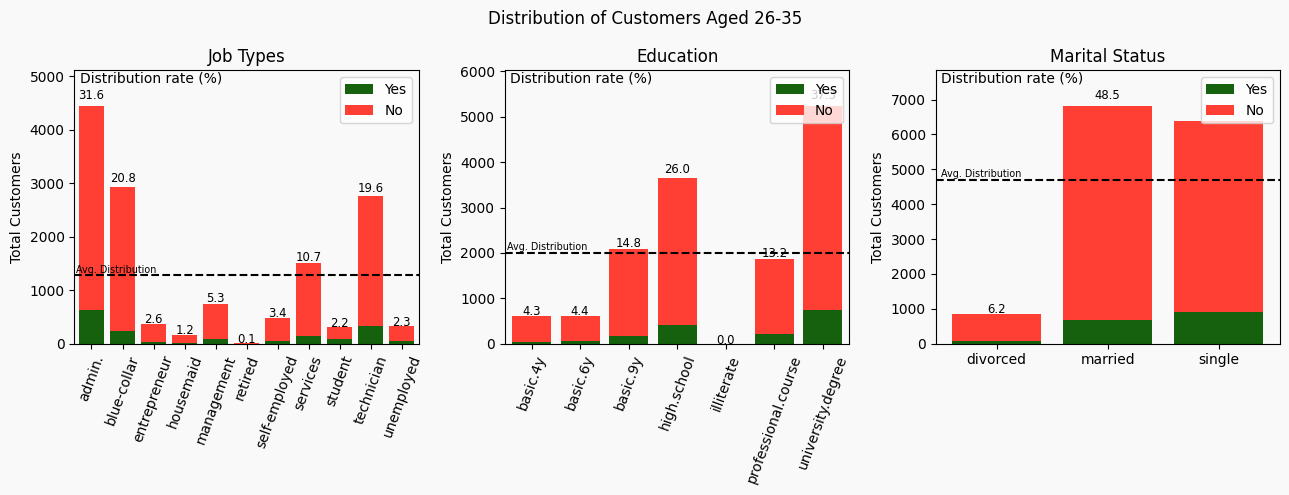

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

stackedbarline(axes[0], df_yes[(df_yes['Age'] >= 26) & (df_yes['Age'] < 36)], df_no[(df_no['Age'] >= 26) & (df_no['Age'] < 36)], 'Type of job', 'Job Types')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)

stackedbarline(axes[1], df_yes[(df_yes['Age'] >= 26) & (df_yes['Age'] < 36)], df_no[(df_no['Age'] >= 26) & (df_no['Age'] < 36)], 'Education', 'Education')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)

stackedbarline(axes[2], df_yes[(df_yes['Age'] >= 26) & (df_yes['Age'] < 36)], df_no[(df_no['Age'] >= 26) & (df_no['Age'] < 36)], 'Marital status', 'Marital Status')

plt.suptitle('Distribution of Customers Aged 26-35')
plt.tight_layout()
plt.show()

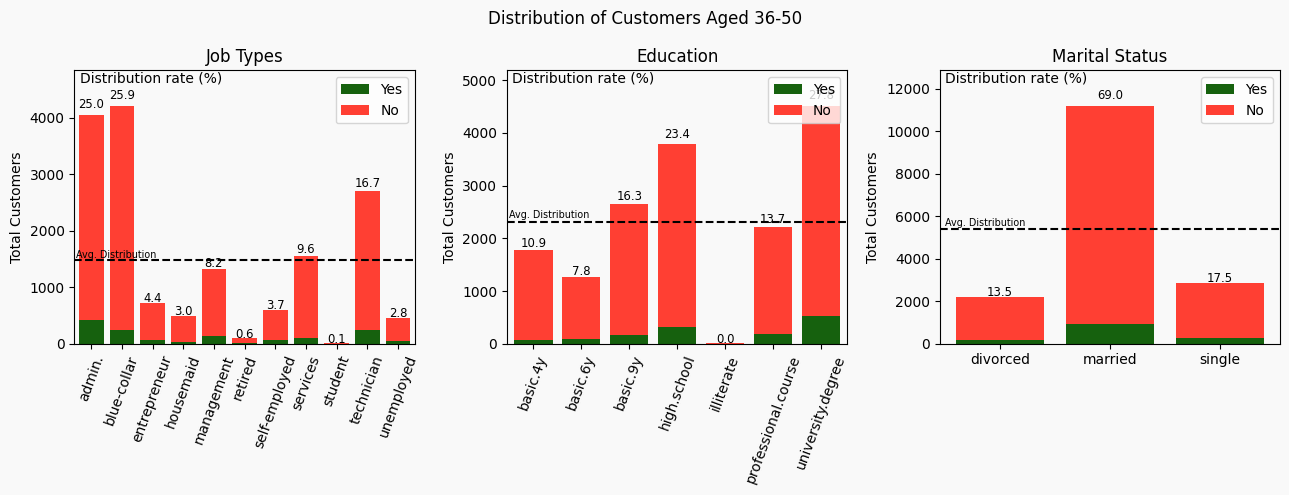

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

stackedbarline(axes[0], df_yes[(df_yes['Age'] >= 36) & (df_yes['Age'] < 51)], df_no[(df_no['Age'] >= 36) & (df_no['Age'] < 51)], 'Type of job', 'Job Types')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)

stackedbarline(axes[1], df_yes[(df_yes['Age'] >= 36) & (df_yes['Age'] < 51)], df_no[(df_no['Age'] >= 36) & (df_no['Age'] < 51)], 'Education', 'Education')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)

stackedbarline(axes[2], df_yes[(df_yes['Age'] >= 36) & (df_yes['Age'] < 51)], df_no[(df_no['Age'] >= 36) & (df_no['Age'] < 51)], 'Marital status', 'Marital Status')

plt.suptitle('Distribution of Customers Aged 36-50')
plt.tight_layout()
plt.show()

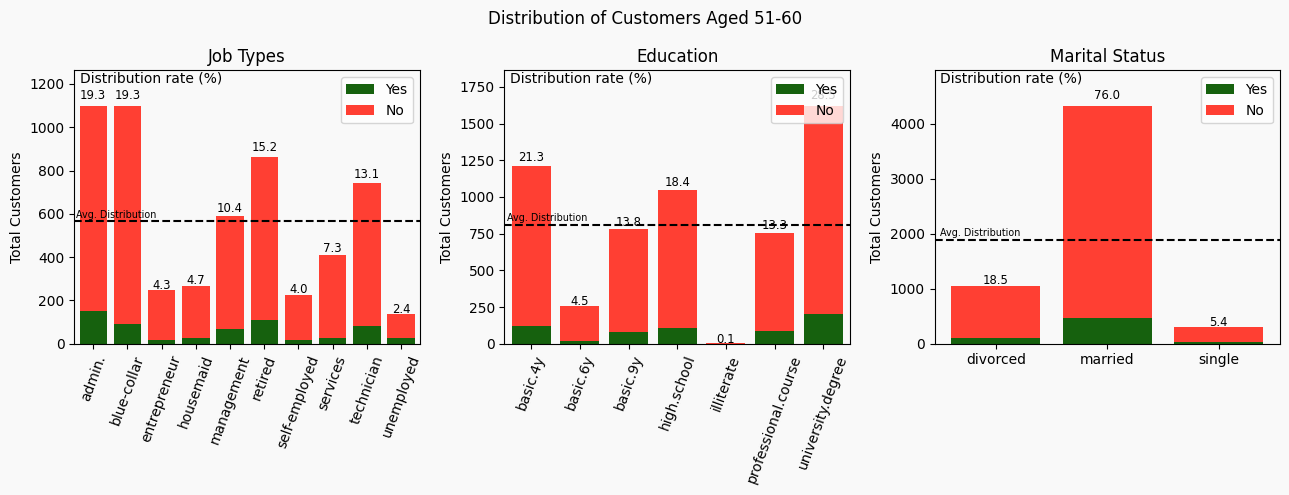

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

stackedbarline(axes[0], df_yes[(df_yes['Age'] >= 51) & (df_yes['Age'] < 61)], df_no[(df_no['Age'] >= 51) & (df_no['Age'] < 61)], 'Type of job', 'Job Types')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)

stackedbarline(axes[1], df_yes[(df_yes['Age'] >= 51) & (df_yes['Age'] < 61)], df_no[(df_no['Age'] >= 51) & (df_no['Age'] < 61)], 'Education', 'Education')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)

stackedbarline(axes[2], df_yes[(df_yes['Age'] >= 51) & (df_yes['Age'] < 61)], df_no[(df_no['Age'] >= 51) & (df_no['Age'] < 61)], 'Marital status', 'Marital Status')

plt.suptitle('Distribution of Customers Aged 51-60')
plt.tight_layout()
plt.show()

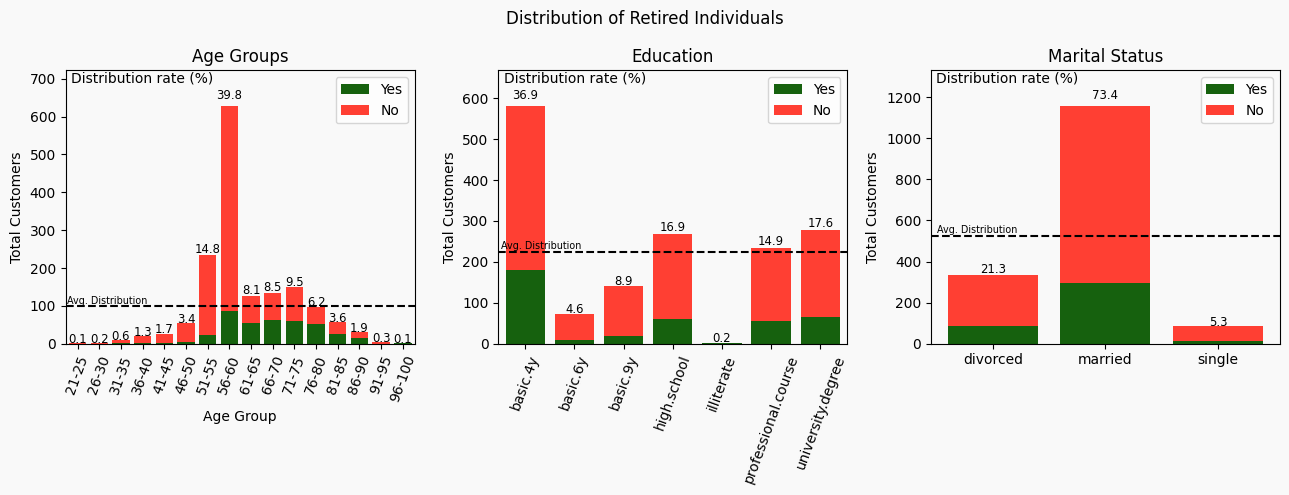

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

stackedbarline(axes[0], df_yes[df_yes['Type of job'] == 'retired'], df_no[df_no['Type of job'] == 'retired'], 'Age range', 'Age Groups')
axes[0].set_xlabel("Age Group")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)

stackedbarline(axes[1], df_yes[df_yes['Type of job'] == 'retired'], df_no[df_no['Type of job'] == 'retired'], 'Education', 'Education')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)

stackedbarline(axes[2], df_yes[df_yes['Type of job'] == 'retired'], df_no[df_no['Type of job'] == 'retired'], 'Marital status', 'Marital Status')

plt.suptitle('Distribution of Retired Individuals')
plt.tight_layout()
plt.show()

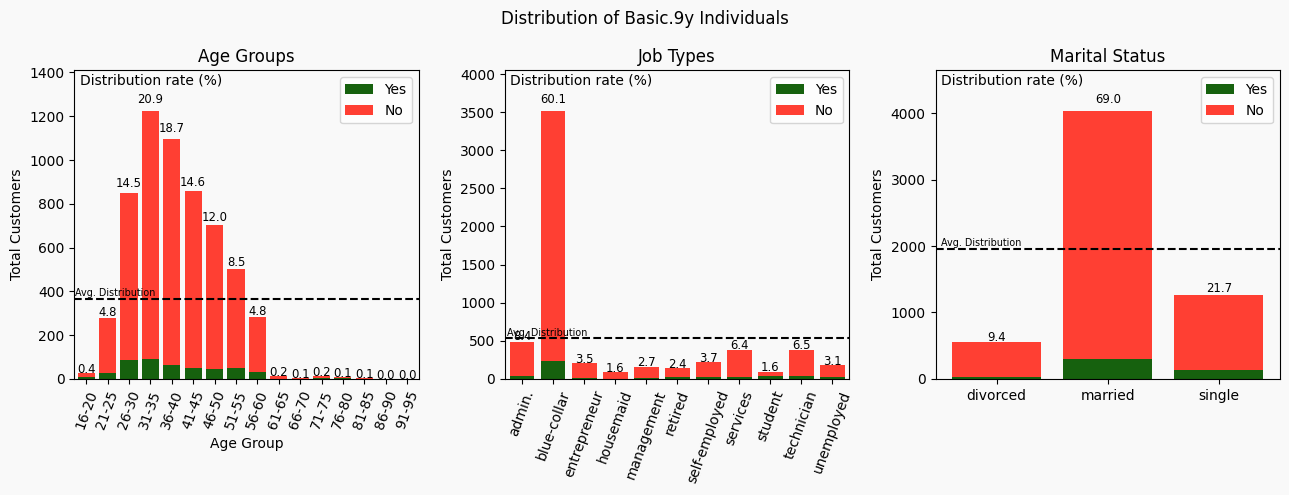

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

stackedbarline(axes[0], df_yes[df_yes['Education'] == 'basic.9y'], df_no[df_no['Education'] == 'basic.9y'], 'Age range', 'Age Groups')
axes[0].set_xlabel("Age Group")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)

stackedbarline(axes[1], df_yes[df_yes['Education'] == 'basic.9y'], df_no[df_no['Education'] == 'basic.9y'], 'Type of job', 'Job Types')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)

stackedbarline(axes[2], df_yes[df_yes['Education'] == 'basic.9y'], df_no[df_no['Education'] == 'basic.9y'], 'Marital status', 'Marital Status')

plt.suptitle('Distribution of Basic.9y Individuals')
plt.tight_layout()
plt.show()

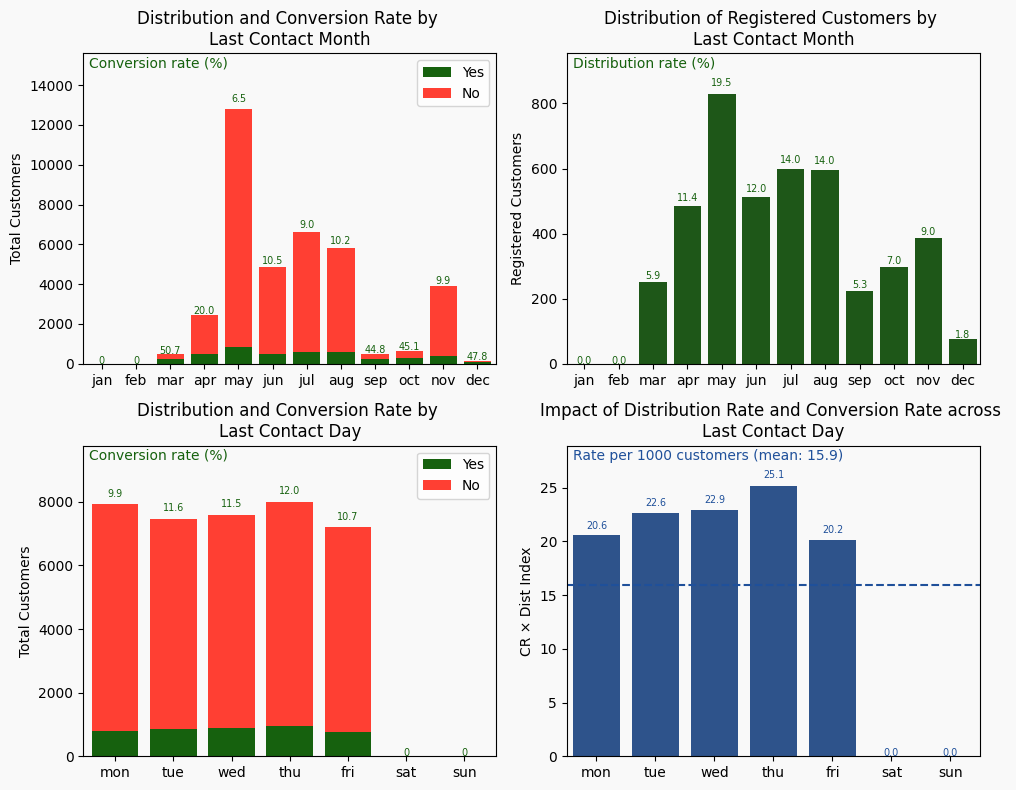

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

stackedbarorder(axes[0, 0], df_yes, df_no, 'Latest month', 'month', "\nLast Contact Month")
barorderdist(axes[0, 1], df_yes, 'Latest month', 'month', "\nLast Contact Month")

stackedbarorder(axes[1, 0], df_yes, df_no, 'Latest day', 'day', "\nLast Contact Day")
barordercrdist(axes[1, 1], df_yes, df_no, 'Latest day', 'day', "\nLast Contact Day")

plt.tight_layout()
plt.show()

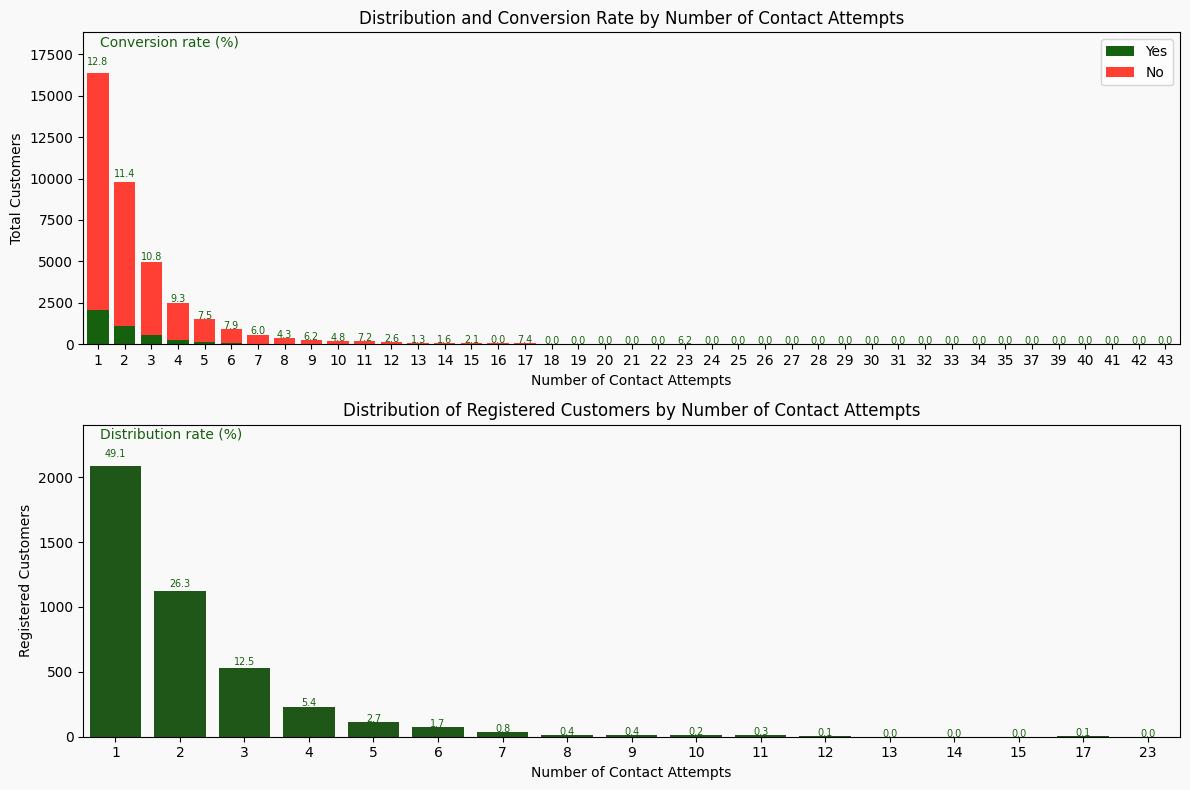

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

stackedbar(axes[0], df_yes, df_no, "Number of contacts", "Number of Contact Attempts")
bardist(axes[1], df_yes, "Number of contacts", 'Number of Contact Attempts')
axes[0].set_xlabel("Number of Contact Attempts")
axes[1].set_xlabel("Number of Contact Attempts")

plt.tight_layout()
plt.show()

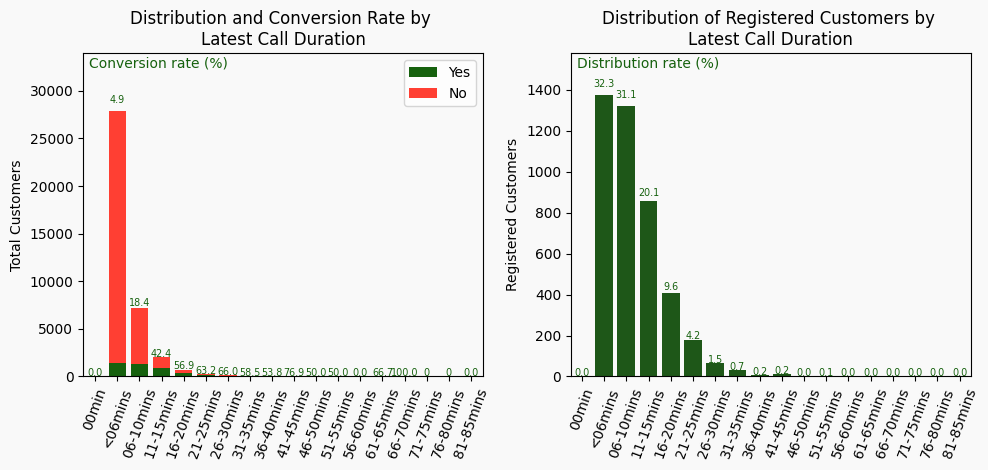

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.8))

stackedbarorder(axes[0], df_yes, df_no, "Latest duration range", 'duration', "\nLatest Call Duration")
barorderdist(axes[1], df_yes, "Latest duration range", 'duration', '\nLatest Call Duration')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)

plt.tight_layout()
plt.show()

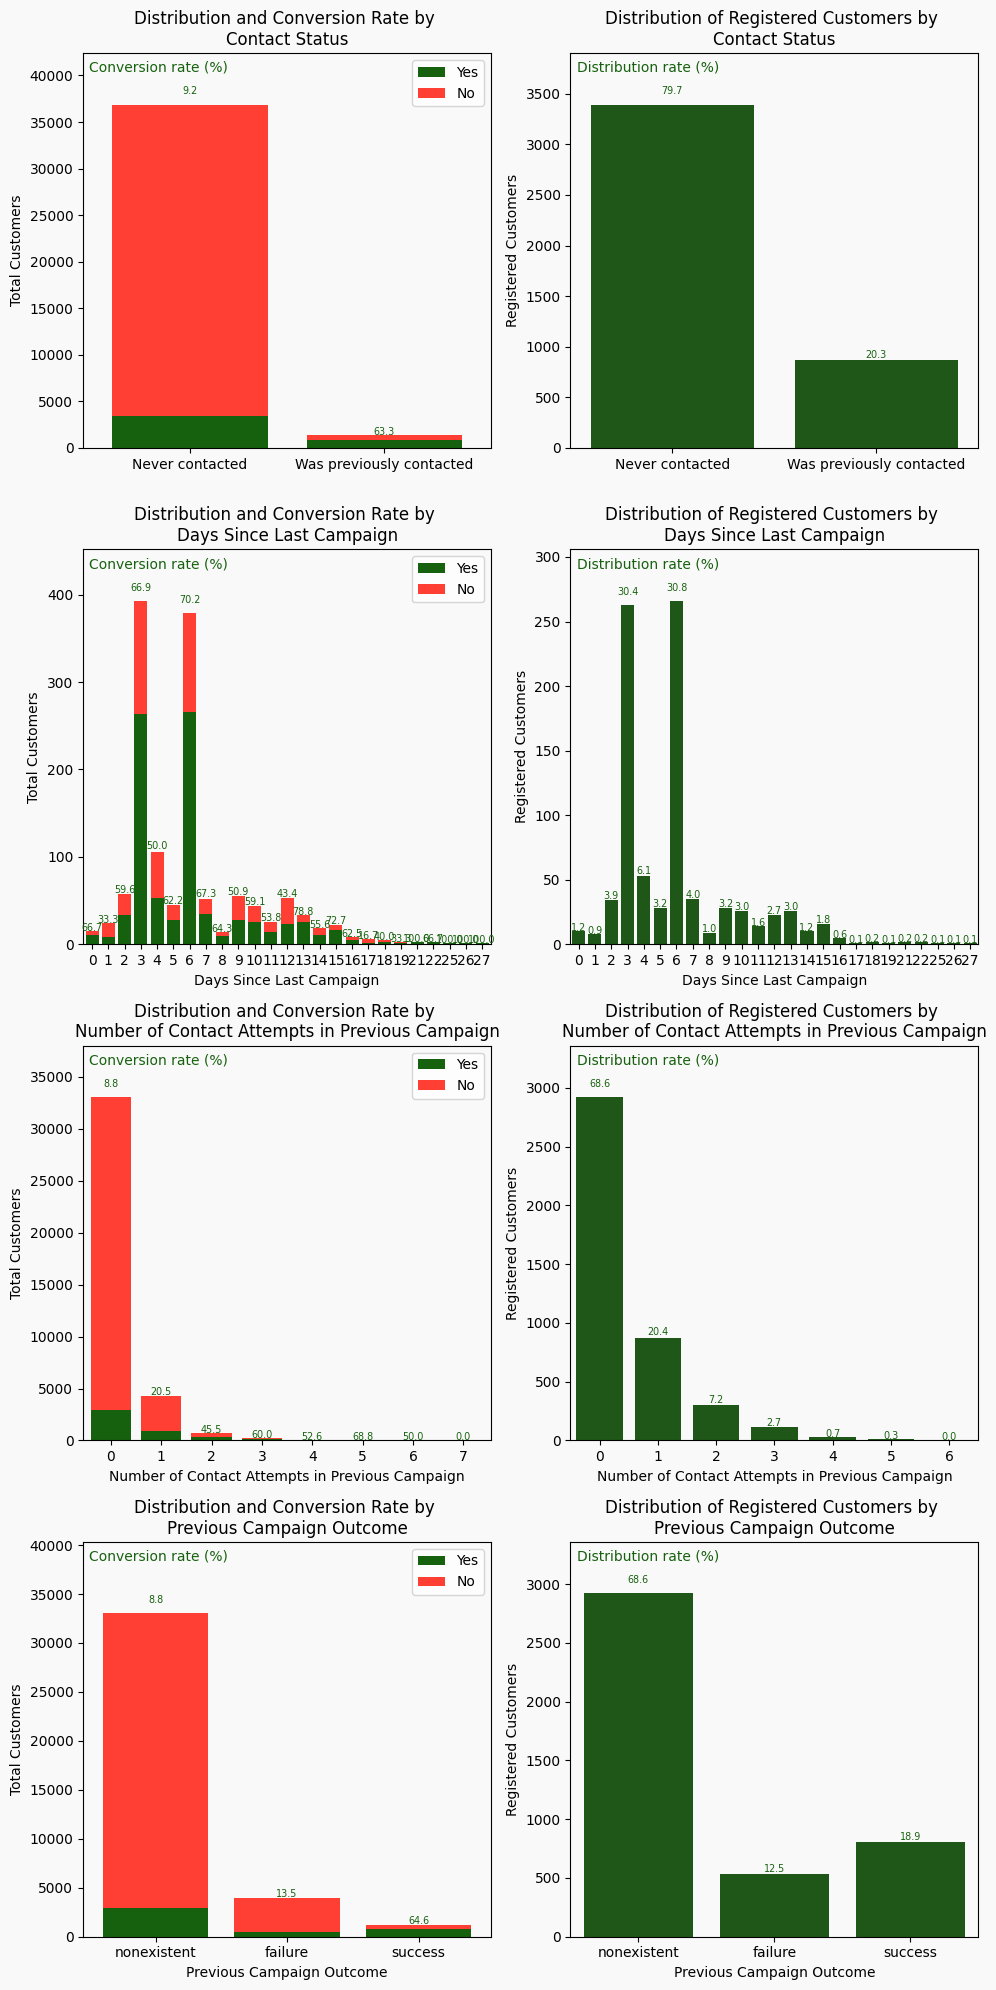

In [38]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))

stackedbar(axes[0, 0], df_yes, df_no, "Contact status", "\nContact Status")
bardist(axes[0, 1], df_yes, "Contact status", '\nContact Status')

stackedbar(axes[1, 0], df_yes[df_yes['Passed days'] > -1], df_no[df_no['Passed days'] > -1], "Passed days", "\nDays Since Last Campaign")
bardist(axes[1, 1], df_yes[df_yes['Passed days'] > -1], "Passed days", '\nDays Since Last Campaign')
axes[1, 0].set_xlabel("Days Since Last Campaign")
axes[1, 1].set_xlabel("Days Since Last Campaign")

stackedbar(axes[2, 0], df_yes, df_no, "Previous campaign's number", "\nNumber of Contact Attempts in Previous Campaign")
bardist(axes[2, 1], df_yes, "Previous campaign's number", "\nNumber of Contact Attempts in Previous Campaign")
axes[2, 0].set_xlabel("Number of Contact Attempts in Previous Campaign")
axes[2, 1].set_xlabel("Number of Contact Attempts in Previous Campaign")

stackedbarorder(axes[3, 0], df_yes, df_no, "Previous campaign outcome", 'desc order', "\nPrevious Campaign Outcome")
barorderdist(axes[3, 1], df_yes, "Previous campaign outcome", 'desc order', "\nPrevious Campaign Outcome")
axes[3, 0].set_xlabel("Previous Campaign Outcome")
axes[3, 1].set_xlabel("Previous Campaign Outcome")

plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Prepare function chart for modeling

In [40]:
def confusionmatrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.gcf().set_facecolor('#f9f9f9')
    plt.gca().set_facecolor('#f9f9f9')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix – {title}')
    plt.show()

In [41]:
def featurechart(df_name, columnx, columny, title):
    plt.figure(figsize=(7,5))
    sns.barplot(data=df_name, x=columnx, y=columny, hue=columny, palette='crest', legend=False)
    plt.title(title)
    plt.ylabel('')
    plt.gcf().set_facecolor('#f9f9f9')
    plt.gca().set_facecolor('#f9f9f9')
    plt.xlim(0, df_name[columnx].max() * 1.11)
    for i in range(df_name.shape[0]):
        plt.text(x=df_name[columnx].iloc[i]*1.01,
        y=i,
        s=round(df_name[columnx].iloc[i],3),
        color="black",
        ha="left",
        fontsize="small")
    plt.tight_layout()
    plt.show()

## Data Preprocessing

In [42]:
df.head()
# df["Previous campaign's outcome"].value_counts()

,Age,Type of job,Marital status,Education,Housing loan,Personal loan,Latest month,Latest day,Latest duration,Number of contacts,Passed days,Previous campaign's number,Previous campaign outcome,Label,Contact status,Age range,Latest duration range
0,56,housemaid,married,basic.4y,no,no,may,mon,261,1,-1,0,nonexistent,0,Never contacted,56-60,<06mins
1,57,services,married,high.school,no,no,may,mon,149,1,-1,0,nonexistent,0,Never contacted,56-60,<06mins
2,37,services,married,high.school,yes,no,may,mon,226,1,-1,0,nonexistent,0,Never contacted,36-40,<06mins
3,40,admin.,married,basic.6y,no,no,may,mon,151,1,-1,0,nonexistent,0,Never contacted,36-40,<06mins
4,56,services,married,high.school,no,yes,may,mon,307,1,-1,0,nonexistent,0,Never contacted,56-60,06-10mins


In [43]:
df.drop(columns=['Age range', 'Latest duration range'], inplace=True)

df['Housing loan'] = df['Housing loan'].replace({'yes': 1, 'no': 0}).astype('Int64')

df['Personal loan'] = df['Personal loan'].replace({'yes': 1, 'no': 0}).astype('Int64')

df['Contact status'] = df['Contact status'].apply(lambda x: 0 if x == 'Never contacted' else 1)

In [44]:
temp, test = train_test_split(df, test_size=0.3, random_state=60)
train, val = train_test_split(temp, test_size=0.3, random_state=60)

print(f'train: {train.shape[0]} rows')
print(f'val: {val.shape[0]} rows')
print(f'test: {test.shape[0]} rows')

train: 18734 rows
val: 8029 rows
test: 11471 rows


### Feature selection (Woe & IV)

In [45]:
def calculate_woe_iv(df_name, feature, Label):
    # Nhóm theo từng giá trị (hoặc bin) của feature
    woe_dfm = df_name.groupby(feature)[Label].agg(['count', 'sum']).reset_index()
    woe_dfm.columns = [feature, 'Total', 'Event']
    woe_dfm['NonEvent'] = woe_dfm['Total'] - woe_dfm['Event']
    # Tổng số lượng event / nonevent
    event_total = woe_dfm['Event'].sum()
    nonevent_total = woe_dfm['NonEvent'].sum()
    # Tính WOE và IV
    woe_dfm['%Event'] = (woe_dfm['Event'] / event_total).replace(0, 1e-8)
    woe_dfm['%NonEvent'] = (woe_dfm['NonEvent'] / nonevent_total).replace(0, 1e-8)
    woe_dfm['WOE'] = np.log(woe_dfm['%Event'].replace(0, 1e-8) / woe_dfm['%NonEvent'])
    woe_dfm['IV'] = (woe_dfm['%Event'] - woe_dfm['%NonEvent']) * woe_dfm['WOE']
    IV_total = woe_dfm['IV'].sum()
    return IV_total

feature_list = [col for col in train.columns if col != 'Label']
ivtotal_results = []

for feature in feature_list:
    ivtotal = calculate_woe_iv(train, feature, 'Label')
    ivtotal_results.append({'Feature': feature, 'IV Importance Score': ivtotal})

ivtotal_table = pd.DataFrame(ivtotal_results).sort_values(by='IV Importance Score', ascending=False)
print(ivtotal_table)

                       Feature  IV Importance Score
8              Latest duration             6.103402
10                 Passed days             0.566659
13              Contact status             0.522121
12   Previous campaign outcome             0.517654
6                 Latest month             0.476739
11  Previous campaign's number             0.311059
0                          Age             0.250470
1                  Type of job             0.158783
9           Number of contacts             0.149583
3                    Education             0.036557
2               Marital status             0.022964
4                 Housing loan             0.004836
7                   Latest day             0.003060
5                Personal loan             0.000194


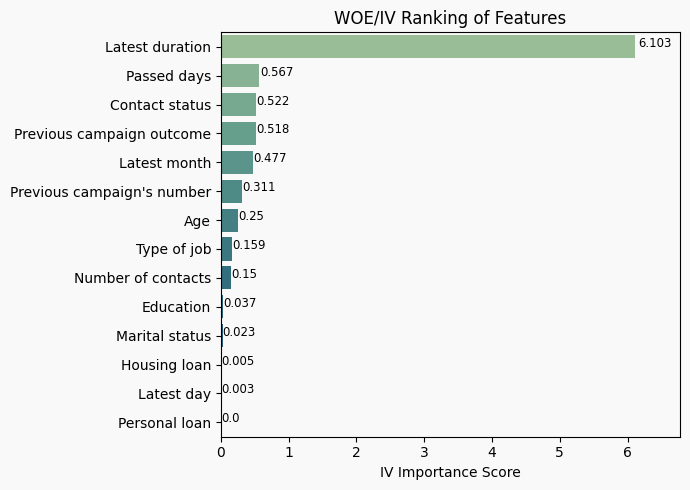

In [46]:
featurechart(ivtotal_table, 'IV Importance Score', 'Feature', 'WOE/IV Ranking of Features')

- **IV Total > 0.3**: Latest duration, Passed days, Contact status, Previous campaign outcome, Latest month, Previous campaign's number  
- **0.1 < IV Total < 0.3**: Age, Type of job, Number of contacts  
- **0.02 < IV Total < 0.1**: Education, Marital status   
- **IV Total < 0.02**: Housing loan, Latest day, Personal loan

**Latest duration (too high IV Total)**: Latest Call Duration emerged as the most important feature. This makes sense, as longer calls may indicate higher customer interest. However, this feature poses a data leakage risk in real-world prediction scenarios prior to the call

In [47]:
# Data for Logistic Regression (LR)
trainLR = train.copy()
valLR = val.copy()
testLR = test.copy()

for data in [trainLR, valLR, testLR]:
    data.drop(columns=['Latest duration', 'Latest day', 'Personal loan', 'Housing loan'], inplace=True)

trainLR.columns

Index(['Age', 'Type of job', 'Marital status', 'Education', 'Latest month',
       'Number of contacts', 'Passed days', 'Previous campaign's number',
       'Previous campaign outcome', 'Label', 'Contact status'],
      dtype='object')

In [48]:
# Data for Decision Tree (DT)
trainDT = train.copy()
valDT = val.copy()
testDT = test.copy()

for data in [trainDT, valDT, testDT]:
    data.drop(columns=['Latest duration'], inplace=True)

trainDT.columns

Index(['Age', 'Type of job', 'Marital status', 'Education', 'Housing loan',
       'Personal loan', 'Latest month', 'Latest day', 'Number of contacts',
       'Passed days', 'Previous campaign's number',
       'Previous campaign outcome', 'Label', 'Contact status'],
      dtype='object')

## Data Transformation

#### WOE Coding for Logistic Regression

In [49]:
trainLR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18734 entries, 10024 to 32590
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         18734 non-null  int64 
 1   Type of job                 18734 non-null  object
 2   Marital status              18734 non-null  object
 3   Education                   18734 non-null  object
 4   Latest month                18734 non-null  object
 5   Number of contacts          18734 non-null  int64 
 6   Passed days                 18734 non-null  int64 
 7   Previous campaign's number  18734 non-null  int64 
 8   Previous campaign outcome   18734 non-null  object
 9   Label                       18734 non-null  Int64 
 10  Contact status              18734 non-null  int64 
dtypes: Int64(1), int64(5), object(5)
memory usage: 1.7+ MB


In [50]:
categorical_cols = ['Type of job', 'Marital status', 'Education', 
                    'Latest month', "Previous campaign outcome"]

def get_woe_map(df, feature, label):
    df_woe = df.groupby(feature)[label].agg(['count', 'sum']).reset_index()
    df_woe.columns = [feature, 'Total', 'Event']
    df_woe['NonEvent'] = df_woe['Total'] - df_woe['Event']
    event_total = df_woe['Event'].sum()
    nonevent_total = df_woe['NonEvent'].sum()
    df_woe['%Event'] = (df_woe['Event'] / event_total).replace(0, 1e-8)
    df_woe['%NonEvent'] = (df_woe['NonEvent'] / nonevent_total).replace(0, 1e-8)
    df_woe['WOE'] = np.log(df_woe['%Event'] / df_woe['%NonEvent'])
    return df_woe[[feature, 'WOE']].set_index(feature)['WOE'].to_dict()

for col in categorical_cols:
    woe_map = get_woe_map(trainLR, col, 'Label')
    for data in [trainLR, valLR, testLR]:
        data[f'{col}_WOE'] = data[col].map(woe_map)

trainLR.drop(columns=categorical_cols, inplace=True)
valLR.drop(columns=categorical_cols, inplace=True)
testLR.drop(columns=categorical_cols, inplace=True)

In [51]:
print(trainLR.info())
print(valLR.info())
print(testLR.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18734 entries, 10024 to 32590
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            18734 non-null  int64  
 1   Number of contacts             18734 non-null  int64  
 2   Passed days                    18734 non-null  int64  
 3   Previous campaign's number     18734 non-null  int64  
 4   Label                          18734 non-null  Int64  
 5   Contact status                 18734 non-null  int64  
 6   Type of job_WOE                18734 non-null  float64
 7   Marital status_WOE             18734 non-null  float64
 8   Education_WOE                  18734 non-null  float64
 9   Latest month_WOE               18734 non-null  float64
 10  Previous campaign outcome_WOE  18734 non-null  float64
dtypes: Int64(1), float64(5), int64(5)
memory usage: 1.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 80

In [52]:
X_trainLR = trainLR.drop("Label", axis=1)
y_trainLR = trainLR["Label"]

X_valLR = valLR.drop("Label", axis=1)
y_valLR = valLR["Label"]

X_testLR = testLR.drop("Label", axis=1)
y_testLR = testLR["Label"]

scaler = StandardScaler()
scaler_trainLR = scaler.fit(X_trainLR)

X_trainLR_scaled = scaler_trainLR.transform(X_trainLR)
X_valLR_scaled = scaler_trainLR.transform(X_valLR)
X_testLR_scaled = scaler_trainLR.transform(X_testLR)

#### One-hot Encoding for Decision Tree

In [53]:
trainDT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18734 entries, 10024 to 32590
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         18734 non-null  int64 
 1   Type of job                 18734 non-null  object
 2   Marital status              18734 non-null  object
 3   Education                   18734 non-null  object
 4   Housing loan                18734 non-null  Int64 
 5   Personal loan               18734 non-null  Int64 
 6   Latest month                18734 non-null  object
 7   Latest day                  18734 non-null  object
 8   Number of contacts          18734 non-null  int64 
 9   Passed days                 18734 non-null  int64 
 10  Previous campaign's number  18734 non-null  int64 
 11  Previous campaign outcome   18734 non-null  object
 12  Label                       18734 non-null  Int64 
 13  Contact status              18734 non-null  int

In [54]:
def onehot_encoding(data):
    categorical_cols = ['Type of job', 'Marital status', 'Education', 'Latest month', 'Latest day', 
                       "Previous campaign outcome"]
    for col in categorical_cols:
        dummies = pd.get_dummies(data[col], prefix=col.replace(' ', ''), prefix_sep='_', drop_first=False).astype(int)
        data = pd.concat([data, dummies], axis=1)
        data.drop(columns=col, inplace=True)
    return data

trainDT = onehot_encoding(trainDT)
valDT = onehot_encoding(valDT)
testDT = onehot_encoding(testDT)

In [55]:
trainDT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18734 entries, 10024 to 32590
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Age                                  18734 non-null  int64
 1   Housing loan                         18734 non-null  Int64
 2   Personal loan                        18734 non-null  Int64
 3   Number of contacts                   18734 non-null  int64
 4   Passed days                          18734 non-null  int64
 5   Previous campaign's number           18734 non-null  int64
 6   Label                                18734 non-null  Int64
 7   Contact status                       18734 non-null  int64
 8   Typeofjob_admin.                     18734 non-null  int64
 9   Typeofjob_blue-collar                18734 non-null  int64
 10  Typeofjob_entrepreneur               18734 non-null  int64
 11  Typeofjob_housemaid                  18734 non-null  in

In [56]:
X_trainDT = trainDT.drop("Label", axis=1)
y_trainDT = trainDT["Label"]

X_valDT = valDT.drop("Label", axis=1)
y_valDT = valDT["Label"]

X_testDT = testDT.drop("Label", axis=1)
y_testDT = testDT["Label"]

## Modeling 1: Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
modelLR = LogisticRegression(class_weight='balanced')

modelLR.fit(X_trainLR_scaled, y_trainLR)

y_predLR = modelLR.predict(X_valLR_scaled)

print(confusion_matrix(y_valLR, y_predLR))
print(classification_report(y_valLR, y_predLR))

[[6114 1039]
 [ 431  445]]
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89      7153
         1.0       0.30      0.51      0.38       876

    accuracy                           0.82      8029
   macro avg       0.62      0.68      0.63      8029
weighted avg       0.86      0.82      0.84      8029



In [59]:
y_predLR = modelLR.predict(X_testLR_scaled)
accuracyLR = accuracy_score(y_testLR, y_predLR)

print('--- Logistic Regression – Training Results ---')
print(f"accuracy score: {accuracyLR:.4f}")
print(confusion_matrix(y_testLR, y_predLR))
print(classification_report(y_testLR, y_predLR))

--- Logistic Regression – Training Results ---
accuracy score: 0.8150
[[8685 1514]
 [ 608  664]]
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     10199
         1.0       0.30      0.52      0.38      1272

    accuracy                           0.82     11471
   macro avg       0.62      0.69      0.64     11471
weighted avg       0.86      0.82      0.84     11471



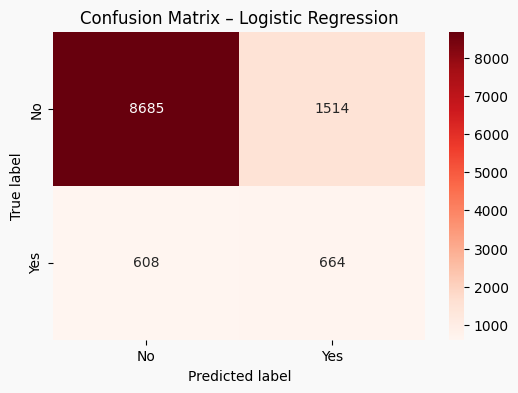

In [60]:
cmLR = confusion_matrix(y_testLR, y_predLR)
confusionmatrix(cmLR, 'Logistic Regression')

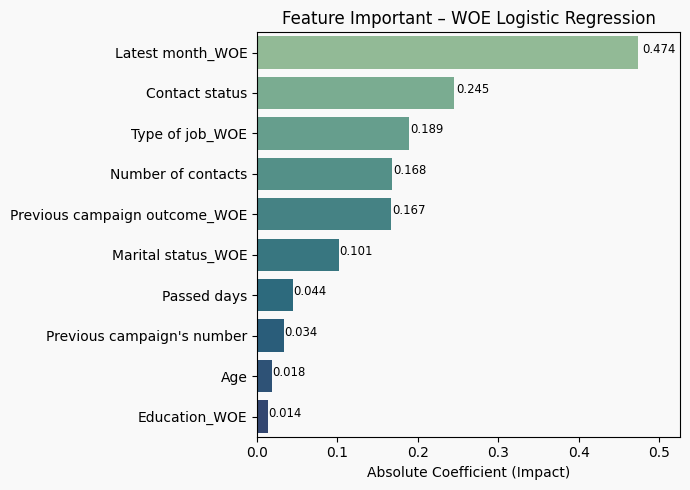

In [61]:
coefs = modelLR.coef_[0]
feature_names = X_testLR.columns
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Absolute Coefficient (Impact)': np.abs(coefs)
}).sort_values(by='Absolute Coefficient (Impact)', ascending=False)

featurechart(feat_imp, 'Absolute Coefficient (Impact)', 'Feature', 'Feature Important – WOE Logistic Regression')

## Modeling 2: Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [63]:
modelDT = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=40, class_weight='balanced')
modelDT.fit(X_trainDT, y_trainDT)

y_valDT_pred = modelDT.predict(X_valDT)

print(confusion_matrix(y_valDT, y_valDT_pred))
print(classification_report(y_valDT, y_valDT_pred))

[[6573  580]
 [ 516  360]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      7153
         1.0       0.38      0.41      0.40       876

    accuracy                           0.86      8029
   macro avg       0.66      0.66      0.66      8029
weighted avg       0.87      0.86      0.87      8029



In [64]:
y_predDT = modelDT.predict(X_testDT)
accuracyDT = accuracy_score(y_testDT, y_predDT)

print('--- Decision Tree – Training Results ---')
print(f"accuracy score: {accuracyDT:.4f}")
print(confusion_matrix(y_testDT, y_predDT))
print(classification_report(y_testDT, y_predDT))

--- Decision Tree – Training Results ---
accuracy score: 0.8596
[[9318  881]
 [ 730  542]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     10199
         1.0       0.38      0.43      0.40      1272

    accuracy                           0.86     11471
   macro avg       0.65      0.67      0.66     11471
weighted avg       0.87      0.86      0.86     11471



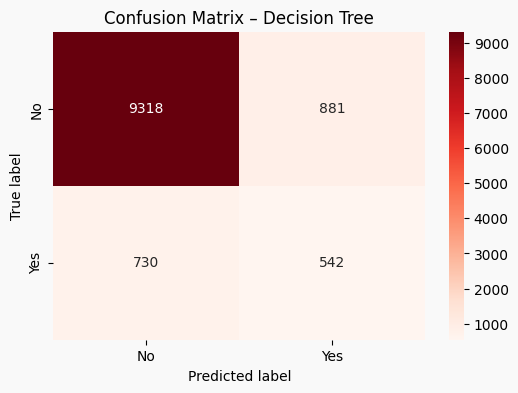

In [65]:
cmDT = confusion_matrix(y_testDT, y_predDT)
confusionmatrix(cmDT, 'Decision Tree')

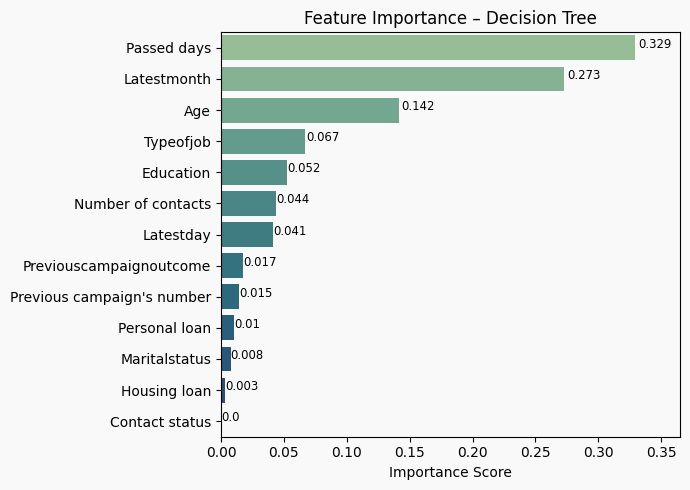

In [66]:
importances = modelDT.feature_importances_

feature_names = X_testDT.columns
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Score': importances})

feat_df['Group'] = feat_df['Feature'].str.split('_').str[0]

grouped = feat_df.groupby('Group', as_index=False)['Importance Score'].sum().sort_values(by='Importance Score', ascending=False)

featurechart(grouped, 'Importance Score', 'Group', 'Feature Importance – Decision Tree')

## Model Evaluation

#### ROC Curve

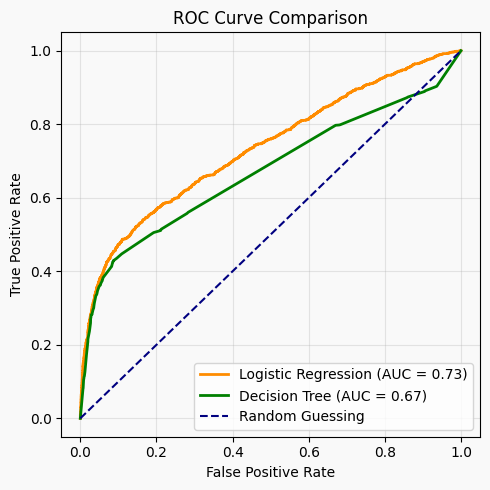

In [67]:
from sklearn.metrics import roc_curve, auc

y_prob_LR = modelLR.predict_proba(X_testLR_scaled)[:, 1]
y_prob_DT = modelDT.predict_proba(X_testDT)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_testLR, y_prob_LR)
fpr_dt, tpr_dt, _ = roc_curve(y_testDT, y_prob_DT)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(5,5))
plt.plot(fpr_lr, tpr_lr, color='darkorange', linewidth=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linewidth=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guessing')
plt.gcf().set_facecolor('#f9f9f9')
plt.gca().set_facecolor('#f9f9f9')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Model performance summary

In [68]:
# F1-score
f1_lr = f1_score(y_testLR, y_predLR)
f1_dt = f1_score(y_testDT, y_predDT)

# Precision
precision_lr = precision_score(y_testLR, y_predLR, pos_label=1.0)
precision_dt = precision_score(y_testDT, y_predDT, pos_label=1.0)

# Recall
recall_lr = recall_score(y_testLR, y_predLR, pos_label=1.0)
recall_dt = recall_score(y_testDT, y_predDT, pos_label=1.0)

metric_valuation = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], 
                           'Logistic Regression': [round(accuracyLR, 4), round(precision_lr, 4), round(recall_lr, 4), 
                                                   round(f1_lr, 4), round(auc_lr, 4)],
                           'Decision Tree': [round(accuracyDT, 4), round(precision_dt, 4), round(recall_dt, 4), 
                                             round(f1_dt, 4), round(auc_dt, 4)]})
metric_valuation.set_index('Metric', inplace=True)

metric_valuation

,Logistic Regression,Decision Tree
Metric,,
Accuracy,0.8150,0.8596
Precision,0.3049,0.3809
Recall,0.5220,0.4261
F1-score,0.3849,0.4022
AUC,0.7342,0.6724


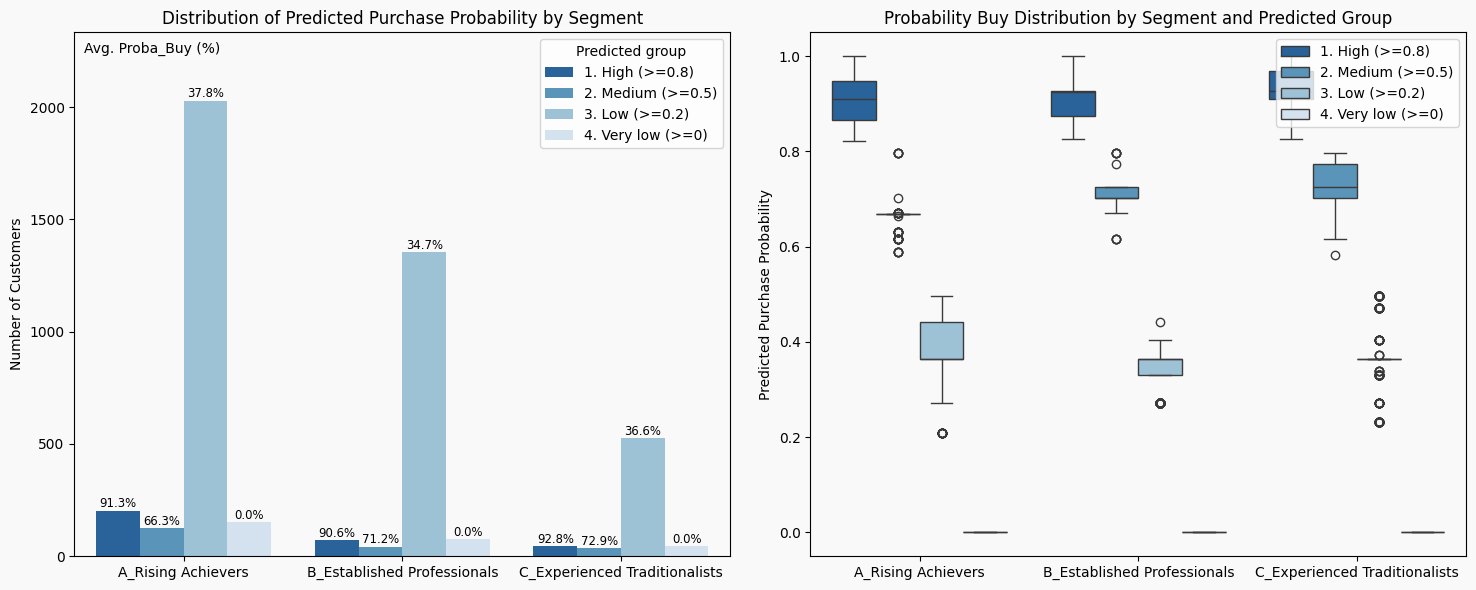

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar Chart
palette = sns.color_palette("Blues", n_colors=4)[::-1]
sns.barplot(data=df_interactiontype, x='Segment', hue='Predicted group', y='count', ax=ax[0],
            hue_order= ['1. High (>=0.8)', '2. Medium (>=0.5)', '3. Low (>=0.2)', '4. Very low (>=0)'],
            order = ['A_Rising Achievers', 'B_Established Professionals', 'C_Experienced Traditionalists'], palette=palette)
ax[0].set_ylabel('Number of Customers')
ax[0].set_xlabel('')
countmean = dict(zip(df_interactiontype['count'], df_interactiontype['mean'].apply(lambda x: f'{round(x*100, 3)}%')))
for p in ax[0].patches:
    height = p.get_height()
    mean_score = countmean.get(height, "")
    ax[0].text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        mean_score,
        ha='center', va='bottom',
        fontsize='small', color='black')
ax[0].set_ylim(0, df_interactiontype['count'].max() * 1.15)
ax[0].text(
x=0.015, 
y=0.955,
s="Avg. Proba_Buy (%)",
transform=ax[0].transAxes,
fontsize="medium",
color="black",
ha="left",
va='bottom')
ax[0].set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')
ax[0].set_title('Distribution of Predicted Purchase Probability by Segment')

# Boxplot Chart
sns.boxplot(data=df_input_encoded[df_input_encoded['Segment'] != 'Unassigned'], x='Segment', y='Proba_Buy', ax=ax[1],
            hue='Predicted group', palette=palette, order=['A_Rising Achievers', 'B_Established Professionals', 'C_Experienced Traditionalists'],
            hue_order=['1. High (>=0.8)', '2. Medium (>=0.5)', '3. Low (>=0.2)', '4. Very low (>=0)'])
ax[1].set_title('Probability Buy Distribution by Segment and Predicted Group')
ax[1].set_xlabel('')
ax[1].set_ylabel('Predicted Purchase Probability')
plt.setp(ax[1].get_xticklabels(), fontsize=10)
ax[1].set_facecolor('#f9f9f9')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()